In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [5]:
data_customer = pd.read_csv("/content/sample_data/data_intro.csv", sep=";")

In [6]:
data_customer.head()

,ID Pelanggan,Nama,Jenis Kelamin,Pendapatan,Produk,Harga,Jumlah,Total,Tingkat Kepuasan
0,1,Arif,1,600000,A,100000,4,400000,2
1,2,Dian,2,1200000,D,250000,4,1000000,2
2,3,Dinda,2,950000,D,250000,3,750000,3
3,4,Fajar,1,400000,A,100000,2,200000,3
4,5,Ika,2,1200000,D,250000,4,1000000,2


In [7]:
# Menampilkan beberapa informasi dasar tentang data
print("Informasi Data:")
print(data_customer.info())

# Statistik Deskriptif
print("\nStatistik Deskriptif:")
print(data_customer.describe())

Informasi Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID Pelanggan      20 non-null     int64 
 1   Nama              20 non-null     object
 2   Jenis Kelamin     20 non-null     int64 
 3   Pendapatan        20 non-null     int64 
 4   Produk            20 non-null     object
 5   Harga             20 non-null     int64 
 6   Jumlah            20 non-null     int64 
 7   Total             20 non-null     int64 
 8   Tingkat Kepuasan  20 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 1.5+ KB
None

Statistik Deskriptif:
       ID Pelanggan  Jenis Kelamin    Pendapatan          Harga    Jumlah   \
count      20.00000      20.000000  2.000000e+01      20.000000  20.000000   
mean       10.50000       1.700000  1.160000e+06  197500.000000   3.650000   
std         5.91608       0.470162  1.282842e+06   69726.910912 

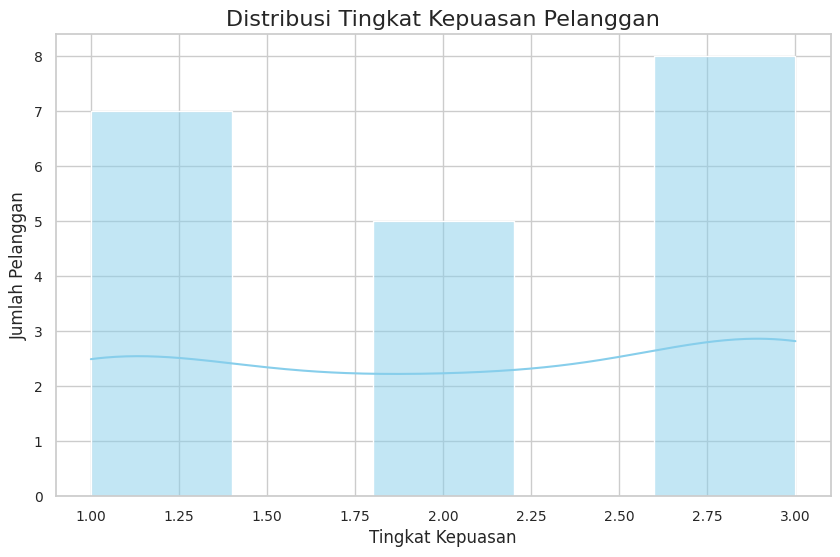

In [14]:
# Visualisasi distribusi Tingkat Kepuasan dengan gaya yang lebih menarik
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")  # Menambahkan grid
sns.histplot(data=data_customer, x='Tingkat Kepuasan', bins=5, kde=True, color='skyblue')
plt.title('Distribusi Tingkat Kepuasan Pelanggan', fontsize=16)
plt.xlabel('Tingkat Kepuasan', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

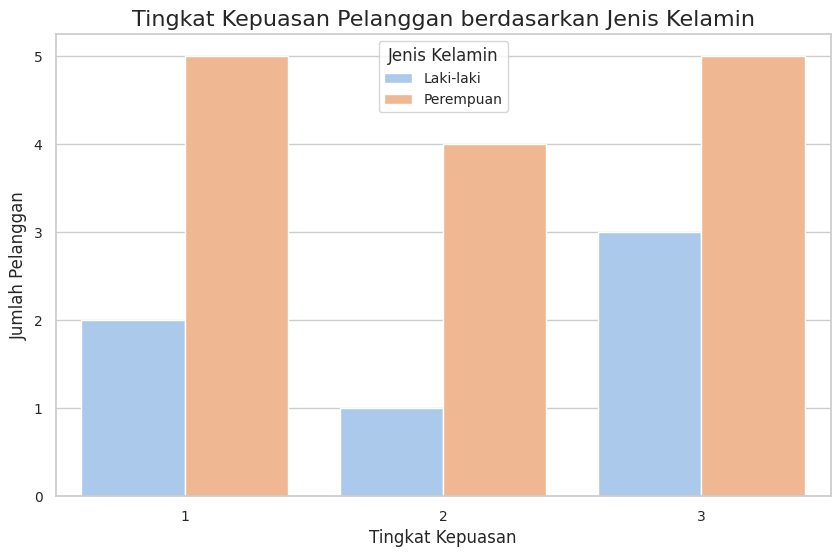

In [15]:
# Analisis Tingkat Kepuasan berdasarkan Jenis Kelamin dengan plot stacked bar
plt.figure(figsize=(10, 6))
sns.set_palette("pastel")  # Mengubah palet warna
sns.countplot(data=data_customer, x='Tingkat Kepuasan', hue='Jenis Kelamin')
plt.title('Tingkat Kepuasan Pelanggan berdasarkan Jenis Kelamin', fontsize=16)
plt.xlabel('Tingkat Kepuasan', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)
plt.legend(title='Jenis Kelamin', labels=['Laki-laki', 'Perempuan'], fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


In [18]:
# Menghitung korelasi Pearson antara Pendapatan dan Tingkat Kepuasan
correlation_pearson = data_customer['Pendapatan'].corr(data_customer['Tingkat Kepuasan'], method='pearson')
print(f"Korelasi Pearson antara Pendapatan dan Tingkat Kepuasan: {correlation_pearson:.2f}")

# Menghitung korelasi Spearman antara Pendapatan dan Tingkat Kepuasan
correlation_spearman = data_customer['Pendapatan'].corr(data_customer['Tingkat Kepuasan'], method='spearman')
print(f"Korelasi Spearman antara Pendapatan dan Tingkat Kepuasan: {correlation_spearman:.2f}")


Korelasi Pearson antara Pendapatan dan Tingkat Kepuasan: -0.31
Korelasi Spearman antara Pendapatan dan Tingkat Kepuasan: -0.19


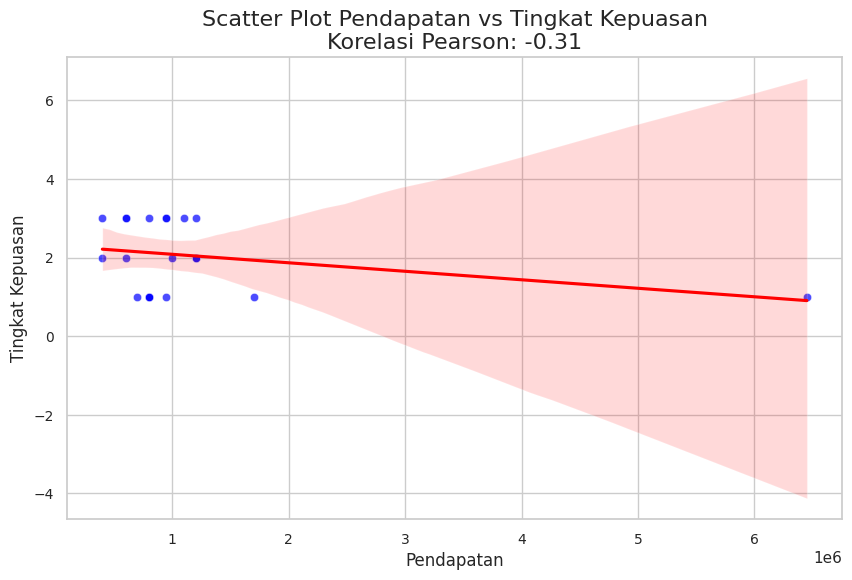

In [19]:
# Menghitung korelasi Pearson antara Pendapatan dan Tingkat Kepuasan
correlation_pearson = data_customer['Pendapatan'].corr(data_customer['Tingkat Kepuasan'], method='pearson')

# Membuat scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_customer, x='Pendapatan', y='Tingkat Kepuasan', color='blue', alpha=0.7)
plt.title(f'Scatter Plot Pendapatan vs Tingkat Kepuasan\nKorelasi Pearson: {correlation_pearson:.2f}', fontsize=16)
plt.xlabel('Pendapatan', fontsize=12)
plt.ylabel('Tingkat Kepuasan', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Menambahkan garis regresi
sns.regplot(data=data_customer, x='Pendapatan', y='Tingkat Kepuasan', scatter=False, color='red')

plt.show()

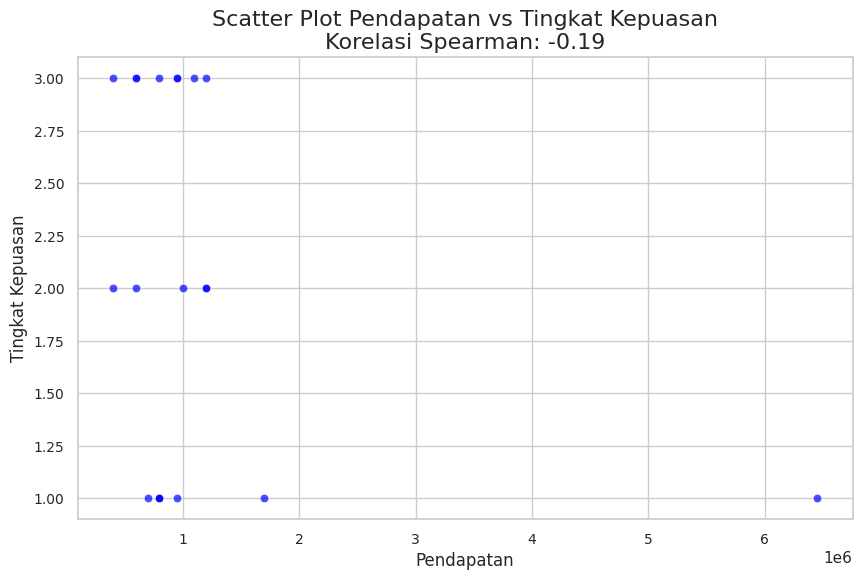

In [20]:
# Menghitung korelasi Spearman antara Pendapatan dan Tingkat Kepuasan
correlation_spearman = data_customer['Pendapatan'].corr(data_customer['Tingkat Kepuasan'], method='spearman')

# Membuat scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_customer, x='Pendapatan', y='Tingkat Kepuasan', color='blue', alpha=0.7)
plt.title(f'Scatter Plot Pendapatan vs Tingkat Kepuasan\nKorelasi Spearman: {correlation_spearman:.2f}', fontsize=16)
plt.xlabel('Pendapatan', fontsize=12)
plt.ylabel('Tingkat Kepuasan', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

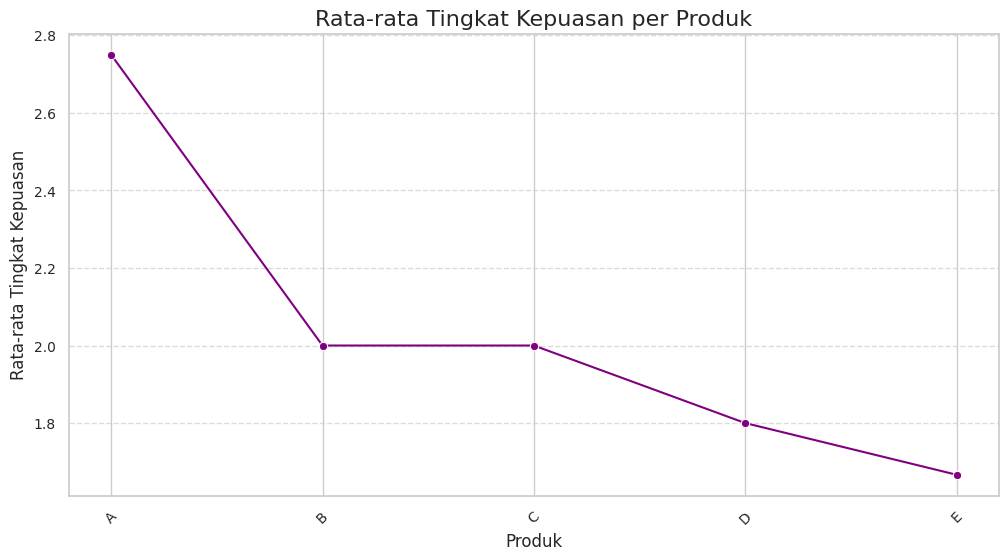

In [16]:
# Analisis Rata-rata Tingkat Kepuasan per Produk dengan grafik garis
average_satisfaction_by_product = data_customer.groupby('Produk')['Tingkat Kepuasan'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.set_palette("muted")  # Mengubah palet warna
sns.lineplot(data=average_satisfaction_by_product, x='Produk', y='Tingkat Kepuasan', marker='o', color='purple')
plt.title('Rata-rata Tingkat Kepuasan per Produk', fontsize=16)
plt.xlabel('Produk', fontsize=12)
plt.ylabel('Rata-rata Tingkat Kepuasan', fontsize=12)
plt.xticks(fontsize=10, rotation=45)  # Memutar label sumbu x
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()